In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import json
import pathlib

In [247]:
# with pathlib.Path('../data/trajectories-1747076042353-gamma2.4.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747078662624-gamma1.5.json').open('r') as f:
with pathlib.Path('../data/trajectories-1747078824025-gamma3.3.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747080775732-gamma5.0.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747081097031.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747081308976.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747159706784.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747159903387.json').open('r') as f:
# with pathlib.Path('../data/trajectories-1747160819021.json').open('r') as f:
  data = json.load(f)

In [267]:
def all_keys(data, level=0):
  for k, v in data.items():
    print('-' * level + str(k))
    if isinstance(v, dict):
      all_keys(v, level + 1)
    elif isinstance(v, list) and len(v) > 0 and isinstance(v[0], dict):
      all_keys(v[0], level + 1)

all_keys(data)

dynamics_config
-num_steps
-num_trials
-seed
metadata
-end_time_s
-start_time_s
-tag
network
-edges
--from
--to
--weight
-thresholds
network_config
-N
-gamma
-seed
results
-states
--state
--step_num
-trial


In [269]:
data['results'][0].keys()

dict_keys(['states', 'trial'])

In [248]:
pd.DataFrame([{**data['dynamics_config'], **data['network_config']}]).T

,0
num_steps,100.0
num_trials,200.0
seed,0.0
N,300.0
gamma,3.3


In [249]:
A = np.array([
  np.array([
    np.array(data['results'][trial_idx]['states'][step_idx]['state'])
    for step_idx in range(data['dynamics_config']['num_steps'])
  ])
  for trial_idx in range(data['dynamics_config']['num_trials'])
])

In [22]:
# trial, step, state
A.shape

(100, 100, 300)

In [174]:
data['network']

{'edges': [{'from': 0, 'to': 0, 'weight': 0.7399523567124273},
  {'from': 0, 'to': 1, 'weight': -0.8236227164370131},
  {'from': 0, 'to': 2, 'weight': 0.3674206657540078},
  {'from': 0, 'to': 3, 'weight': -0.7591982465777093},
  {'from': 0, 'to': 4, 'weight': -0.9786019962555489},
  {'from': 0, 'to': 5, 'weight': 0.11453645997395556},
  {'from': 0, 'to': 6, 'weight': 0.8142181042242964},
  {'from': 0, 'to': 7, 'weight': 0.7209133289008889},
  {'from': 0, 'to': 8, 'weight': -0.323097242073897},
  {'from': 0, 'to': 9, 'weight': -0.9456823385251655},
  {'from': 0, 'to': 10, 'weight': 0.6017187234793124},
  {'from': 0, 'to': 11, 'weight': 0.6119698649705845},
  {'from': 0, 'to': 12, 'weight': 0.736976229778562},
  {'from': 0, 'to': 13, 'weight': 0.33929320367293325},
  {'from': 0, 'to': 14, 'weight': 0.6155577200456612},
  {'from': 0, 'to': 15, 'weight': 0.7949965706217821},
  {'from': 0, 'to': 16, 'weight': -0.09234011157667865},
  {'from': 0, 'to': 17, 'weight': 0.11565060021966778},
  {

In [250]:
G = nx.DiGraph()
for edge in data['network']['edges']:
  G.add_edge(edge['from'], edge['to'], weight=edge['weight'])

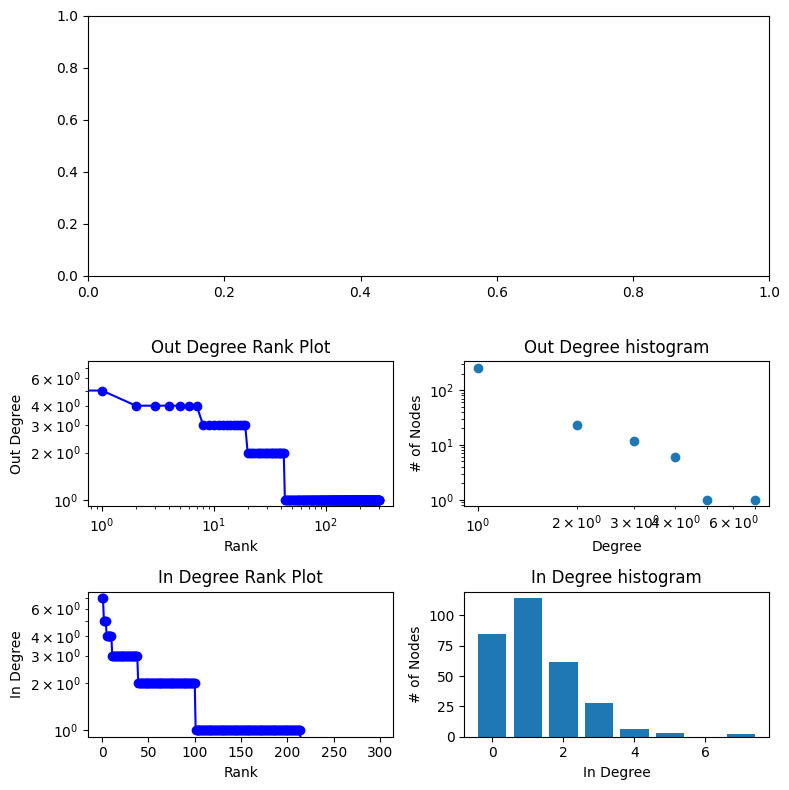

In [251]:
out_degree_sequence = sorted((d for n, d in G.out_degree()), reverse=True)
in_degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
d_out_max = max(out_degree_sequence)
d_in_max = max(in_degree_sequence)

fig = plt.figure("Degrees of power law graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(3+2+2, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.strongly_connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Largest strongly Connected component of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:5, :2])
ax1.plot(out_degree_sequence, "b-", marker="o")
ax1.set_title("Out Degree Rank Plot")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel("Out Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:5, 2:])
ax2.scatter(*np.unique(out_degree_sequence, return_counts=True))
ax2.set_title("Out Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("# of Nodes")

ax1 = fig.add_subplot(axgrid[5:7, :2])
ax1.plot(in_degree_sequence, "b-", marker="o")
ax1.set_yscale('log')
ax1.set_title("In Degree Rank Plot")
ax1.set_ylabel("In Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[5:7, 2:])
ax2.bar(*np.unique(in_degree_sequence, return_counts=True))
ax2.set_title("In Degree histogram")
ax2.set_xlabel("In Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [217]:
np.unique(out_degree_sequence, return_counts=True)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   54,   56,   57,
          59,   60,   61,   62,   65,   66,   67,   68,   70,   71,   72,
          73,   74,   75,   76,   77,   83,   87,   89,   90,   92,  101,
         103,  104,  105,  106,  111,  112,  115,  117,  119,  120,  130,
         133,  136,  137,  138,  147,  152,  156,  157,  158,  169,  171,
         181,  186,  207,  230,  233,  293,  294,  327,  344,  345,  348,
         350,  434,  471,  520,  521,  541,  628,  684,  728,  792,  817,
         857,  902,  925, 1023, 1035, 1238, 1282]),
 array([6114, 1510,  673,  378,  246,  177,  128,   92,   64,   57,   36,
          47,   36,   23,   35,   25,   18,   25,   16,   17

[None,
 None,
 Text(0.5, 0, 'Out Degree'),
 Text(0, 0.5, '# of Nodes'),
 Text(0.5, 1.0, 'Out Degree histogram')]

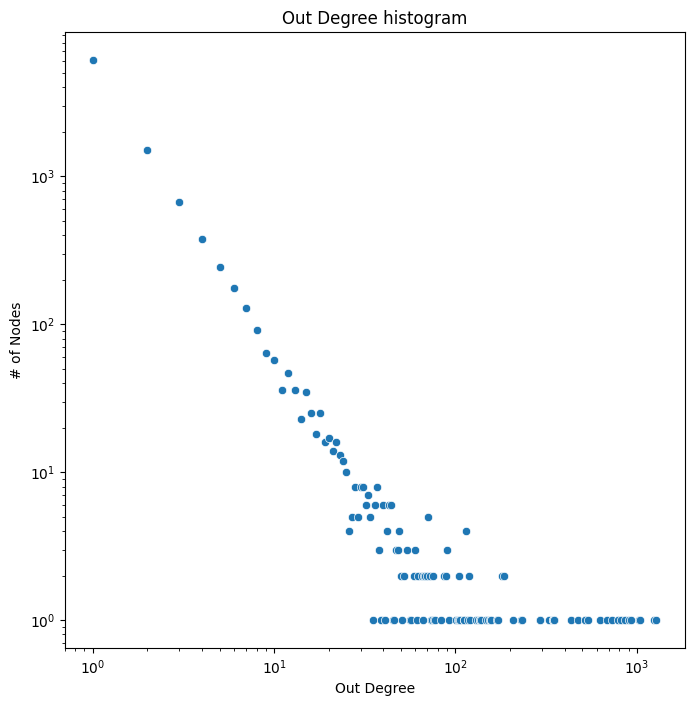

In [225]:
fig = plt.figure("Out Degree histogram", figsize=(8, 8))
xs, ys = np.unique(out_degree_sequence, return_counts=True)
sns.scatterplot(x=xs, y=ys).set(xscale='log', yscale='log', 
  xlabel="Out Degree", ylabel="# of Nodes", title="Out Degree histogram")

In [233]:
ods_df = pd.DataFrame(data=out_degree_sequence, columns=["Out Degree"])

In [232]:
out_degree_sequence

[1282,
 1238,
 1035,
 1023,
 925,
 902,
 857,
 817,
 792,
 728,
 684,
 628,
 541,
 521,
 520,
 471,
 434,
 350,
 348,
 345,
 344,
 327,
 294,
 293,
 233,
 230,
 207,
 186,
 186,
 181,
 181,
 171,
 169,
 158,
 157,
 156,
 152,
 147,
 138,
 137,
 136,
 133,
 130,
 120,
 119,
 119,
 117,
 115,
 115,
 115,
 115,
 112,
 111,
 106,
 105,
 104,
 104,
 103,
 101,
 92,
 90,
 90,
 90,
 89,
 89,
 87,
 87,
 83,
 77,
 76,
 75,
 75,
 74,
 73,
 72,
 72,
 71,
 71,
 71,
 71,
 71,
 70,
 70,
 68,
 68,
 67,
 67,
 66,
 65,
 65,
 62,
 62,
 61,
 60,
 60,
 60,
 59,
 59,
 57,
 56,
 54,
 54,
 54,
 52,
 52,
 51,
 50,
 50,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 47,
 47,
 47,
 46,
 45,
 44,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 3

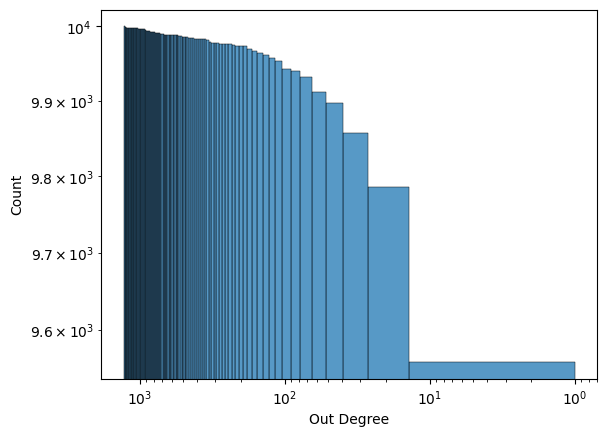

In [241]:
g = sns.histplot(data=ods_df, x="Out Degree", bins=100, cumulative=True)
g.set(xscale='log', yscale='log')
g.invert_xaxis()

In [ ]:
ksum(G.in_degree(u) == 0 for u in G.nodes())/len(G.nodes())/2

0.175

In [252]:
hamming_distance_data = []
for trial_idx_1 in range(data['dynamics_config']['num_trials']):
  for trial_idx_2 in range(trial_idx_1+1, data['dynamics_config']['num_trials']):
    hs = (A[trial_idx_1] ^ A[trial_idx_2]).mean(axis=1)
    for t, h in enumerate(hs):
      hamming_distance_data.append({
        'trial_idx_1': trial_idx_1,
        'trial_idx_2': trial_idx_2,
        'time': t,
        'hamming_distance': h,
      })

hamming_distance_df = pd.DataFrame(hamming_distance_data)

In [193]:
hamming_distance_df

,trial_idx_1,trial_idx_2,time,hamming_distance
0,0,1,0,0.496
1,0,1,1,0.382
2,0,1,2,0.320
3,0,1,3,0.284
4,0,1,4,0.278
...,...,...,...,...
122495,48,49,95,0.268
122496,48,49,96,0.268
122497,48,49,97,0.268
122498,48,49,98,0.268


<Axes: xlabel='time', ylabel='hamming_distance'>

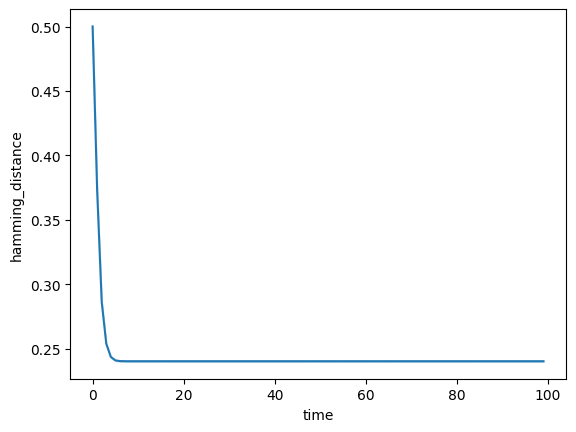

In [253]:
sns.lineplot(
  data=(
    hamming_distance_df[
        (hamming_distance_df['trial_idx_1'] >= 0)
      & (hamming_distance_df['trial_idx_2'] >= 0)
  ]),
  x='time',
  y='hamming_distance',
  errorbar=('ci', 95),
  # hue='trial_idx_1',
  # palette=sns.color_palette("husl", data['dynamics_config']['num_trials']),
  legend=False,
)

In [255]:
K = np.mean([G.in_degree(u) for u in G.nodes()])
K

np.float64(1.25)

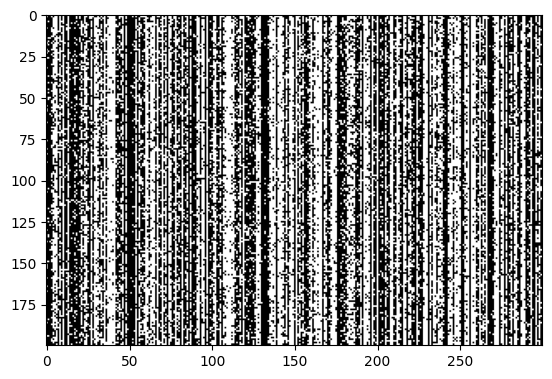

In [263]:
plt.imshow(A[:,99,:], aspect='equal', cmap='gray')

In [123]:
hamming_distance_df[hamming_distance_df['time']==99]

,trial_idx_1,trial_idx_2,time,hamming_distance
99,0,1,99,0.286667
199,0,2,99,0.243333
299,0,3,99,0.200000
399,0,4,99,0.206667
499,0,5,99,0.233333
...,...,...,...,...
1989599,196,198,99,0.243333
1989699,196,199,99,0.226667
1989799,197,198,99,0.216667
1989899,197,199,99,0.180000


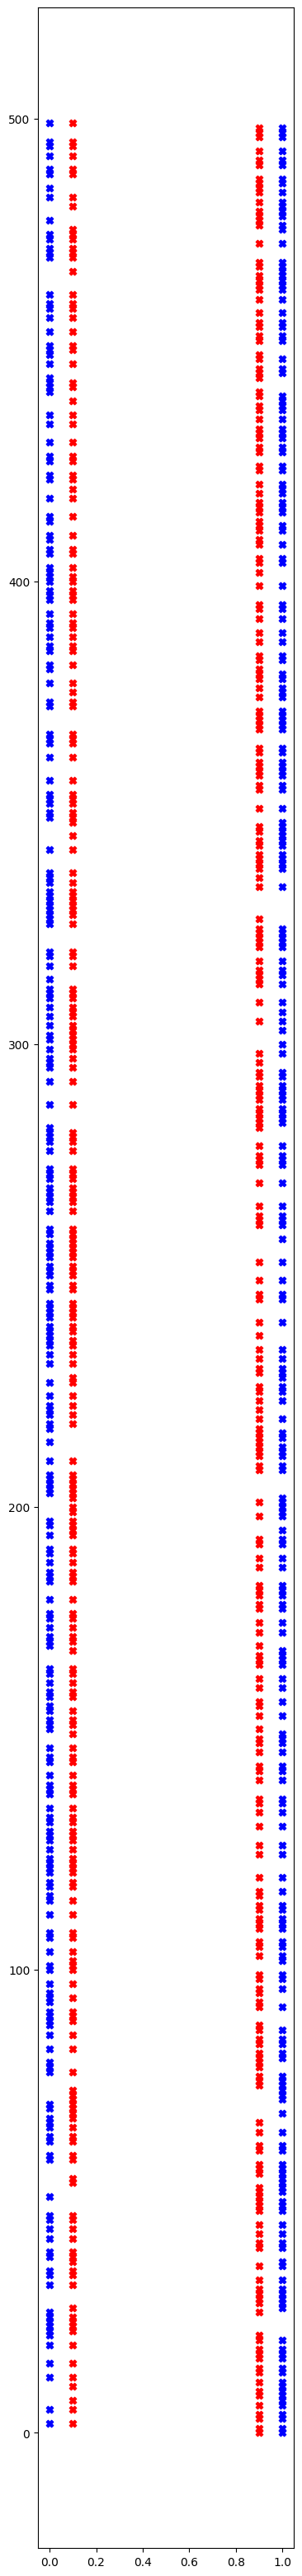

In [180]:
eps = .1
plt.figure(figsize=(4, 40))
plt.scatter(A[0,99,:], range(data['network_config']['N']) , marker='X', c='blue')
plt.scatter((lambda x: (1-2*eps)*x+eps)(A[1,99,:]), range(data['network_config']['N']) , marker='X', c='red')